In [129]:
import pandas as pd
import matplotlib as plt
import numpy as np
import plotly.express as px
from string import printable
pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [2]:
df= pd.read_csv('aac_intakes_outcomes.csv')

In [3]:
df

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.000000,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,2007,7,2017-12,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,Neutered Male,1,3650,10.000000,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.000000,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,2007,7,2014-12,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,Neutered Male,1,2555,7.000000,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.000000,"(5.0, 7.5]",2014-03-08 17:10:00,3,2014,2014-03,Saturday,17,3.0,2007,7,2014-03,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research in Austin (TX),Normal,Public Assist,Neutered Male,1,2190,6.000000,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.000000,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2004,4,2014-04,10 years,A047759,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,Neutered Male,1,3650,10.000000,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.000000,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,1997,10,2013-11,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,12034 Research Blvd in Austin (TX),Injured,Public Assist,Neutered Male,1,5840,16.000000,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79667,2 weeks,A769060,2018-03-14 00:00:00,Partner,Transfer,Unknown,14,0.038356,"(-0.025, 2.5]",2018-03-29 18:14:00,3,2018,2018-03,Thursday,18,1.0,2018,3,2018-03,2 weeks,A769060,Cat,Domestic Shorthair Mix,Tortie,1208 Coaches Crossing in Pflugerville (TX),Normal,Stray,Unknown,1,14,0.038356,"(-0.025, 2.5]",2018-03-29 16:23:00,3,2018,2018-03,Thursday,16,1.0,0 days 01:51:00.000000000,0.077083
79668,2 years,A769064,2016-03-29 00:00:00,Rabies Risk,Euthanasia,Unknown,730,2.000000,"(-0.025, 2.5]",2018-03-29 18:30:00,3,2018,2018-03,Thursday,18,1.0,2016,3,2018-03,2 years,A769064,Other,Bat Mix,Brown,2519 Scarbrough Dr in Travis (TX),Normal,Wildlife,Unknown,1,730,2.000000,"(-0.025, 2.5]",2018-03-29 17:13:00,3,2018,2018-03,Thursday,17,1.0,0 days 01:17:00.000000000,0.053472
79669,1 year,A769065,2017-03-29 00:00:00,Rabies Risk,Euthanasia,Unknown,365,1.000000,"(-0.025, 2.5]",2018-03-29 18:28:00,3,2018,2018-03,Thursday,18,1.0,2017,3,2018-03,1 year,A769065,Other,Bat Mix,Brown,1122 Walton Ln in Austin (TX),Normal,Wildlife,Unknown,1,365,1.000000,"(-0.025, 2.5]",2018-03-29 17:19:00,3,2018,2018-03,Thursday,17,1.0,0 days 01:09:00.000000000,0.047917
79670,10 months,A769066,2017-05-01 00:00:00,NaN,Retu

In [4]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

In [5]:
df.drop(['count','dob_monthyear'],axis=1,inplace=True)

In [6]:
df.outcome_subtype.unique()

array([nan, 'Partner', 'Foster', 'Suffering', 'Medical', 'Behavior',
       'In Kennel', 'Aggressive', 'Rabies Risk', 'In Foster', 'At Vet',
       'Offsite', 'Snr', 'Possible Theft', 'SCRP', 'Court/Investigation',
       'Enroute', 'In Surgery', 'Barn', 'Underage'], dtype=object)

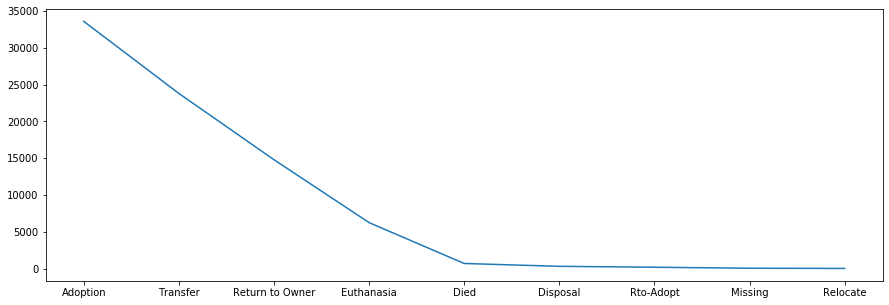

In [7]:
df['outcome_type'].value_counts().plot(figsize=(15,5))

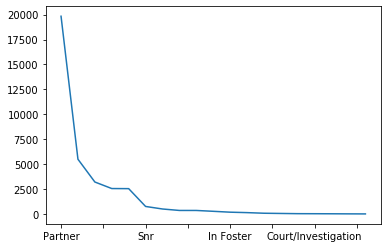

In [8]:
df['outcome_subtype'].value_counts().plot()

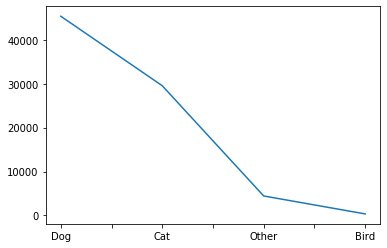

In [9]:
df['animal_type'].value_counts().plot()

In [10]:
df=df[(df['animal_type']== 'Dog')|(df['animal_type']== 'Cat')]
df=df[df.outcome_type=='Adoption']

In [11]:
df.date_of_birth=df.date_of_birth.apply(lambda x: x[:10])

In [12]:
df.outcome_datetime

12       2013-11-22 09:44:00
14       2016-10-07 12:34:00
22       2015-10-29 15:00:00
32       2016-11-15 10:37:00
48       2013-11-16 12:24:00
                ...         
79649    2018-04-02 19:05:00
79653    2018-04-01 17:27:00
79654    2018-04-03 15:23:00
79655    2018-03-31 18:26:00
79658    2018-04-01 17:12:00
Name: outcome_datetime, Length: 33256, dtype: object

In [13]:
df['outcome_time']=df.outcome_datetime.apply(lambda x: x[11:])

In [14]:
df['outcome_date']=df.outcome_datetime.apply(lambda x: x[:10])

In [15]:
df['intake_date']=df.intake_datetime.apply(lambda x: x[:10])
df['intake_time']=df.intake_datetime.apply(lambda x: x[11:])

In [16]:
df[['intake_date','intake_time']]

,intake_date,intake_time
12,2013-10-03,15:47:00
14,2016-09-28,12:05:00
22,2015-10-06,12:29:00
32,2016-08-17,14:05:00
48,2013-11-13,18:16:00
...,...,...
79649,2018-03-28,18:08:00
79653,2018-03-28,18:51:00
79654,2018-03-29,11:44:00
79655,2018-03-29,11:44:00


In [17]:
df.outcome_datetime.describe()

count                   33256
unique                  31482
top       2017-07-29 17:56:00
freq                        6
Name: outcome_datetime, dtype: object

In [18]:
df['outcome_datetime']=pd.to_datetime(df['outcome_datetime'])
df['intake_datetime']=pd.to_datetime(df['intake_datetime'])

In [19]:
df['time_in_shelter'] = df['outcome_datetime'] - df['intake_datetime']

In [20]:
df.time_in_shelter.describe()

count                      33256
mean     29 days 12:14:56.173322
std      52 days 07:52:13.054129
min              0 days 00:01:00
25%              4 days 23:00:45
50%             10 days 04:52:00
75%             36 days 06:19:15
max           1268 days 23:24:00
Name: time_in_shelter, dtype: object

In [21]:
df[['time_in_shelter','outcome_type']].groupby('outcome_type').describe()

time_in_shelter                                                  \
                       count                    mean                     std   
outcome_type                                                                   
Adoption               33256 29 days 12:14:56.173322 52 days 07:52:13.054129   

                                                                         \
                  min             25%              50%              75%   
outcome_type                                                              
Adoption     00:01:00 4 days 23:00:45 10 days 04:52:00 36 days 06:19:15   

                                 
                            max  
outcome_type                     
Adoption     1268 days 23:24:00

In [22]:
df['outcome_type'].value_counts()

Adoption    33256
Name: outcome_type, dtype: int64

In [23]:
df['outcome_datetime'].dt.dayofweek

12       4
14       4
22       3
32       1
48       5
        ..
79649    0
79653    6
79654    1
79655    5
79658    6
Name: outcome_datetime, Length: 33256, dtype: int64

In [24]:
df['outcome_month']=df.outcome_datetime.apply(lambda x: str(x)[5:7])
df['outcome_year']=df.outcome_datetime.apply(lambda x: str(x)[:4])
df['outcome_weekday']=df.outcome_datetime.dt.dayofweek

In [25]:
df[['outcome_datetime','outcome_month','outcome_year']]

,outcome_datetime,outcome_month,outcome_year
12,2013-11-22 09:44:00,11,2013
14,2016-10-07 12:34:00,10,2016
22,2015-10-29 15:00:00,10,2015
32,2016-11-15 10:37:00,11,2016
48,2013-11-16 12:24:00,11,2013
...,...,...,...
79649,2018-04-02 19:05:00,04,2018
79653,2018-04-01 17:27:00,04,2018
79654,2018-04-03 15:23:00,04,2018
79655,2018-03-31 18:26:00,03,2018


In [26]:
df['outcome_weekday']=df.outcome_datetime.dt.dayofweek

In [27]:
df[['outcome_datetime','outcome_month','outcome_year','outcome_weekday']]

,outcome_datetime,outcome_month,outcome_year,outcome_weekday
12,2013-11-22 09:44:00,11,2013,4
14,2016-10-07 12:34:00,10,2016,4
22,2015-10-29 15:00:00,10,2015,3
32,2016-11-15 10:37:00,11,2016,1
48,2013-11-16 12:24:00,11,2013,5
...,...,...,...,...
79649,2018-04-02 19:05:00,04,2018,0
79653,2018-04-01 17:27:00,04,2018,6
79654,2018-04-03 15:23:00,04,2018,1
79655,2018-03-31 18:26:00,03,2018,5


In [28]:
df['intake_month']=df.intake_datetime.apply(lambda x: str(x)[5:7])
df['intake_year']=df.intake_datetime.apply(lambda x: str(x)[:4])
df['intake_weekday']=df.intake_datetime.dt.dayofweek

In [29]:
df[['intake_datetime','intake_month','intake_year','intake_weekday']]

,intake_datetime,intake_month,intake_year,intake_weekday
12,2013-10-03 15:47:00,10,2013,3
14,2016-09-28 12:05:00,09,2016,2
22,2015-10-06 12:29:00,10,2015,1
32,2016-08-17 14:05:00,08,2016,2
48,2013-11-13 18:16:00,11,2013,2
...,...,...,...,...
79649,2018-03-28 18:08:00,03,2018,2
79653,2018-03-28 18:51:00,03,2018,2
79654,2018-03-29 11:44:00,03,2018,3
79655,2018-03-29 11:44:00,03,2018,3


In [30]:
df[df.intake_year>df.outcome_year]

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,outcome_time,outcome_date,intake_date,intake_time


In [31]:
df[['animal_type','outcome_type','sex_upon_intake','sex_upon_outcome']][((df['sex_upon_outcome']=='Intact Female')|(df['sex_upon_outcome']=='Intact Male'))].groupby('outcome_type').count()

,animal_type,sex_upon_intake,sex_upon_outcome
outcome_type,,,
Adoption,1302,1302,1302


In [71]:
df[['intake_condition','time_in_shelter']].groupby('intake_condition').describe()

time_in_shelter                          \
                           count                    mean   
intake_condition                                           
Aged                          65 51 days 08:50:24.923076   
Feral                         17 60 days 22:55:49.411764   
Injured                      957 56 days 07:52:03.448275   
Normal                     31189 27 days 14:43:53.780499   
Nursing                      484 65 days 12:16:47.603305   
Other                         37 80 days 06:53:50.270270   
Pregnant                      21 48 days 13:23:22.857142   
Sick                         486 53 days 20:22:50.370370   

                                                                            \
                                      std             min              25%   
intake_condition                                                             
Aged              86 days 10:07:15.811728 0 days 20:52:00  8 days 01:41:00   
Feral             92 days 22:56:57.232771 4 days 05:27:00  7 days 04:10:00   
Injured           75 days 08:33:10.888823 1 days 03:20:00 13 days 18:10:00   
Normal            50 days 01:35:42.631264 0 days 00:01:00  4 days 19:12:00   
Nursing           36 days 04:40:59.881539 1 days 12:40:00 45 days 14:17:00   
Other            109 days 12:15:11.996964 4 days 06:07:00 10 days 07:02:00   
Pregnant          59 days 05:22:36.931275 4 days 04:06:00  5 days 06:42:00   
Sick              88 days 22:19:29.269161 0 days 03:35:00 10 days 09:34:45   

                                                                       
                              50%              75%                max  
intake_condition                                                       
Aged             17 days 02:48:00 43 days 23:21:00  383 days 12:59:00  
Feral            17 days 06:14:00 61 days 23:10:00  370 days 03:23:00  
Injured          32 days 22:13:00 67 days 00:16:00  652 days 23:08:00  
Normal            9 days 05:23:00 33 days 03:20:00 1268 days 23:24:00  
Nursing          57 days 22:58:00 74 days 09:23:30  282 days 23:46:00  
Other            43 days 03:24:00 81 days 01:13:00  488 days 21:20:00  
Pregnant         22 days 23:31:00 80 days 20:32:00  250 days 06:30:00  
Sick             30 days 03:39:00 61 days 05:33:30 1067 days 19:55:00

In [52]:
condition=[
    df['intake_condition'] == 'Aged',
    df['intake_condition'] == 'Ferral',
    df['intake_condition'] == 'Injured',
    df['intake_condition'] == 'Normal',
    df['intake_condition'] == 'Nursing',
    df['intake_condition'] == 'Other',
    df['intake_condition'] == 'Pregnant',
    df['intake_condition'] == 'Sick'
]
choises=[
    1,
    0,
    0,
    1,
    1,
    1,
    1,
    0
]
df['health']=np.select(condition,choises)

In [54]:
df['health'].value_counts()

1    31796
0     1460
Name: health, dtype: int64

In [55]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'age_upon_intake',
       'animal_id_intake', 'animal_type', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake',
       'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days',
       'outcome_time', 'outcome_date', 'intake_date', 'intake_time', 'health'],
      dtype='object')

In [58]:
df[['time_in_shelter_days','time_in_shelter']]

,time_in_shelter_days,time_in_shelter
12,49.747917,49 days 17:57:00
14,9.020139,9 days 00:29:00
22,23.104861,23 days 02:31:00
32,89.855556,89 days 20:32:00
48,2.755556,2 days 18:08:00
...,...,...
79649,5.039583,5 days 00:57:00
79653,3.941667,3 days 22:36:00
79654,5.152083,5 days 03:39:00
79655,2.279167,2 days 06:42:00


In [99]:
px.bar(df['time_in_shelter'].value_counts())

In [100]:
data=df.intake_weekday.value_counts()
fig=px.bar(data, title="Amount of adoptions per Weekday")
fig.show()


In [104]:
data=df.outcome_weekday.value_counts()
fig=px.bar(data, title="Amount of adoptions per Weekday")
fig.show()


In [105]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'age_upon_intake',
       'animal_id_intake', 'animal_type', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake',
       'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days',
       'outcome_time', 'outcome_date', 'intake_date', 'intake_time', 'health'],
      dtype='object')

In [107]:
df.breed.value_counts()

Domestic Shorthair Mix                 9865
Labrador Retriever Mix                 2368
Pit Bull Mix                           2324
Chihuahua Shorthair Mix                2270
Domestic Medium Hair Mix               1037
                                       ... 
Australian Kelpie/Shiba Inu               1
Norwich Terrier                           1
Cocker Spaniel/Dachshund                  1
Pit Bull/Blue Lacy                        1
English Foxhound/Labrador Retriever       1
Name: breed, Length: 1444, dtype: int64

In [226]:
lob=[]
conditions=[
    df.breed.endswith('mix'),
    str(df.breed).find('/')!= -1,
    str(df.breed).find('/')== -1
]
choises=[
    lob.append([str(df.breed)]),
    lob.append(str(df.breed).split('/')),
    lob.append([str(df.breed)])
]

np.select(conditions,choises)

lob

AttributeError: 'Series' object has no attribute 'endswith'

In [225]:
df.breed

0                             Dachshund Mix
1                       Chihuahua Shorthair
2                 Labrador Retriever/Beagle
3                       German Shepherd Mix
4                               Pointer Mix
                        ...                
33251                          Pit Bull Mix
33252                       German Shepherd
33253    Labrador Retriever/German Shepherd
33254    Labrador Retriever/German Shepherd
33255                Domestic Shorthair Mix
Name: breed, Length: 33256, dtype: object

In [190]:
df.reset_index(drop=True,inplace=True)

In [234]:
df[df.animal_type=='Dog'].breed

0                             Dachshund Mix
1                       Chihuahua Shorthair
2                 Labrador Retriever/Beagle
3                       German Shepherd Mix
4                               Pointer Mix
                        ...                
33250               Chihuahua Shorthair Mix
33251                          Pit Bull Mix
33252                       German Shepherd
33253    Labrador Retriever/German Shepherd
33254    Labrador Retriever/German Shepherd
Name: breed, Length: 20581, dtype: object

In [196]:
list_of_breeds=[]

In [235]:
for i in range(len(df.breed)):
    if df.breed[i].find('/')==-1:
        list_of_breeds.append([df.breed[i]])
    else:
        list_of_breeds.append(df.breed[i].split('/'))
        

KeyError: 6

In [200]:
list_of_breeds=[val for sublist in list_of_breeds for val in sublist]

In [203]:
test =list_of_breeds

In [228]:
dup_list=[]
uniqe_list=[]


for i in test:
    dup_list.append(i)
unique_list=list(set(dup_list))


for i in test:
    dup_list.append(i)
unique_list=list(set(dup_list))
final_dic={}
for company in unique_list:
    final_dic[company]=0

for company in dup_list:
    final_dic[company]=final_dic[company]+1


In [244]:
def unique_breed_dic (dictionary,column):
    df=dictionary.copy()
    df.reset_index(drop=True,inplace=True)
    
    list_of_breeds=[]
    for i in range(len(df[column])):
        if df[column][i].find('/')==-1:
            list_of_breeds.append([df[column][i]])
        else:
            list_of_breeds.append(df[column][i].split('/'))
        
    list_of_breeds=[val for sublist in list_of_breeds for val in sublist]
    
    dup_list=[]
    uniqe_list=[]


    for i in list_of_breeds:
        dup_list.append(i)
    unique_list=list(set(dup_list))


    for i in list_of_breeds:
        dup_list.append(i)
    unique_list=list(set(dup_list))
    final_dic={}
    for company in unique_list:
        final_dic[company]=0

    for company in dup_list:
        final_dic[company]=final_dic[company]+1
    return final_dic

In [252]:
unique_breed_dic(df[df.animal_type=='Cat'],'breed')

{'Maine Coon Mix': 110,
 'Turkish Angora Mix': 2,
 'Domestic Shorthair Mix': 19730,
 'Russian Blue': 4,
 'Javanese Mix': 4,
 'American Wirehair Mix': 2,
 'Havana Brown Mix': 2,
 'Himalayan': 4,
 'Ragdoll Mix': 16,
 'Cymric Mix': 8,
 'Domestic Longhair': 54,
 'Abyssinian Mix': 6,
 'Scottish Fold Mix': 4,
 'Domestic Medium Hair': 132,
 'Snowshoe': 8,
 'Burmese': 4,
 'Balinese Mix': 16,
 'British Shorthair Mix': 6,
 'Sphynx': 2,
 'Russian Blue Mix': 66,
 'Japanese Bobtail': 8,
 'Manx': 10,
 'American Shorthair Mix': 158,
 'Tonkinese Mix': 8,
 'Snowshoe Mix': 138,
 'Munchkin Shorthair Mix': 4,
 'Chartreux Mix': 2,
 'Bengal': 8,
 'Ragdoll': 4,
 'Himalayan Mix': 30,
 'Cornish Rex Mix': 2,
 'American Curl Shorthair': 10,
 'Manx Mix': 90,
 'Domestic Medium Hair Mix': 2074,
 'Domestic Longhair Mix': 1156,
 'British Shorthair': 2,
 'Pixiebob Shorthair Mix': 8,
 'Ocicat Mix': 2,
 'Domestic Shorthair': 386,
 'American Curl Shorthair Mix': 12,
 'Siamese Mix': 910,
 'Angora Mix': 12,
 'Siamese': 84,

In [135]:
df[df.breed == 'Norwich Terrier']

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,outcome_time,outcome_date,intake_date,intake_time,health
50737,3 years,A727286,2013-05-20,NaN,Adoption,Spayed Female,1095,3.0,"(2.5, 5.0]",2016-05-26 13:39:00,05,2016,2016-05,3,13,1.0,2013,5,3 years,A727286,Dog,Norwich Terrier,Tan,11111 Renel St in Austin (TX),Normal,Stray,Intact Female,1095,3.0,"(2.5, 5.0]",2016-05-20 15:26:00,05,2016,2016-05,4,15,1.0,5 days 22:13:00,5.925694,13:39:00,2016-05-26,2016-05-20,15:26:00,1


In [128]:
df.breed[4790].split('/')

['Pit Bull', 'Blue Lacy']

In [150]:
df.breed[4790].find('/')== -1

False

In [144]:
df.breed[50737]

'Norwich Terrier'

In [146]:
test='Pit Bull Mix'

In [147]:
test.find('/')

-1

In [168]:
test1=[]
test2=[]

test1.append(df.breed[4790].split('/'))

In [169]:
test1.append(df.breed[4790].split('/'))
test1

[['Pit Bull', 'Blue Lacy'], ['Pit Bull', 'Blue Lacy']]

In [170]:
test1.append(['hello'])

In [171]:
flattened = [val for sublist in test1 for val in sublist]

In [173]:
flattened.value_counts()

AttributeError: 'list' object has no attribute 'value_counts'

In [248]:
df.color

0          Black/Tan
1          Tan/Black
2        Sable/White
3        Black/Brown
4           Tricolor
            ...     
33251    Black/White
33252      Black/Tan
33253    Black/White
33254      Black/Tan
33255      White/Tan
Name: color, Length: 33256, dtype: object